In this tutorial we see how can we can effectively use max and min filter to distinguish
between smooth and texture edges  in grayscale images.

We will use the `mapwindow` function in `ImageFiltering.jl` which provides a general
functionality to apply any function to the window around each pixel.

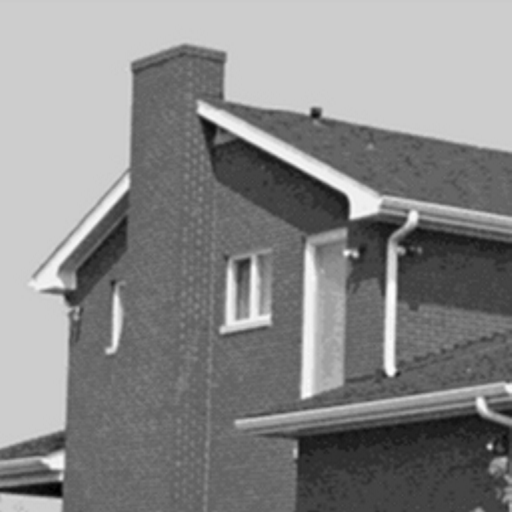

In [1]:
using ImageCore, ImageShow, ImageFiltering
using TestImages

img = Gray.(testimage("house");)      # Original Image

We can use the `minimum` function to compute the minimum of the grayscale values in the given
matrix or array. For example:

In [2]:
minimum([Gray(0.7),Gray(0.5),Gray(0.0)]) # Should return Gray(0.0) i.e black.

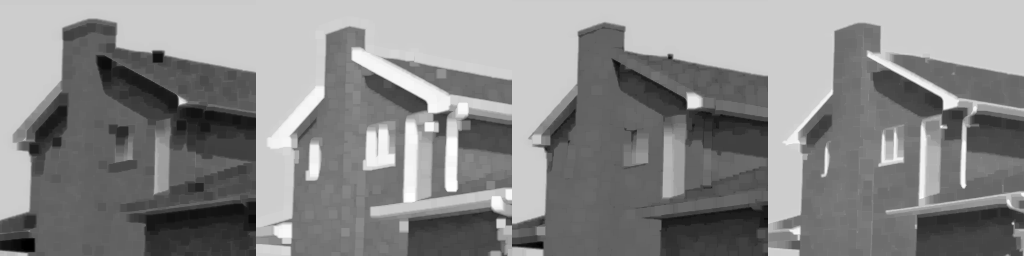

In [3]:
filter_size = (15, 15)
# Using the `mapwindow` function, we create an image of the local minimum.
# `mapwindow` maps the given function over a moving window of given size.
img_min = mapwindow(minimum, img, filter_size)
# Similarly for maximum
img_max = mapwindow(maximum, img, filter_size)
# The max(min) filter
img_max_min = mapwindow(maximum, img_min, filter_size)
# The min(max) filter
img_min_max = mapwindow(minimum, img_max, filter_size)
mosaicview(img_min, img_max, img_max_min, img_min_max; nrow=1)

Now that we are done with the basic filtered images, we proceed to the next part
which is edge detection using these filters.

For edge detection, we need to define thresholds for our image. The threshold is an important tool
to binarize a grayscale image. The threshold value for a given pixel practically
decides if the pixel visible or not in the output image. However, appyling a global threshold might not consider the
variation of colors/brightness within the image. Thus we consider an adaptive type theresholding method
here using max/min results.

The max(min) and min(max) filter effectively follows the smooth edges of the image. Therefore,
their average also follows the smooth parts of the image. If we use this image as a threshold for the original
image, the smooth parts of the original image will get filtered out, leaving only the texture and/or noise behind.
So we can use the average of `img_max_min` and `img_min_max` as the texture threshold.

The average of min and max filters also gives us the smooth edges, but it also includes the noise in the image.
So using average of `img_min` and `img_max` as a threshold will yeild only texture.

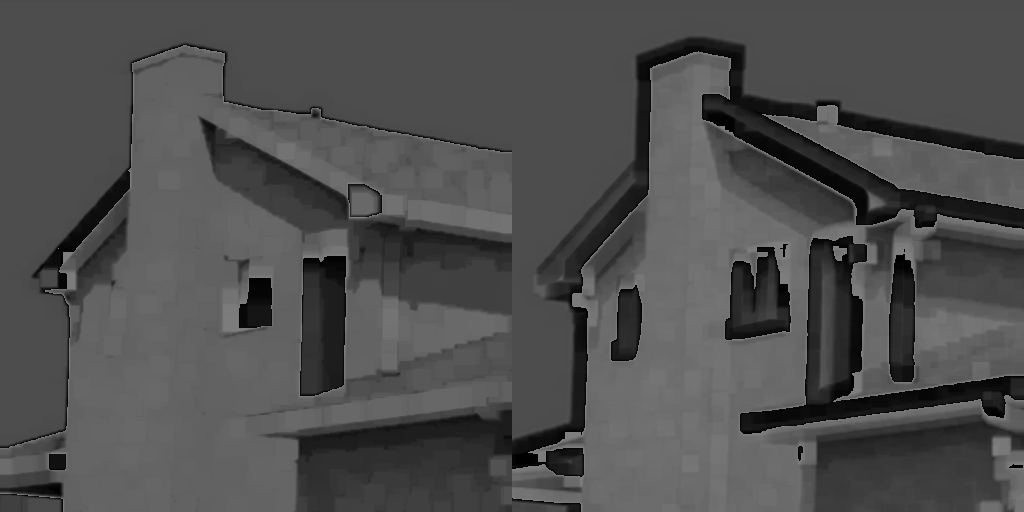

In [4]:
img_texture_noise_threshold = (img_max_min + img_max_min) ./ 2
img_texture_threshold = (img_max + img_min) ./ 2
mosaicview(img_texture_noise_threshold, img_texture_threshold; nrow=1)

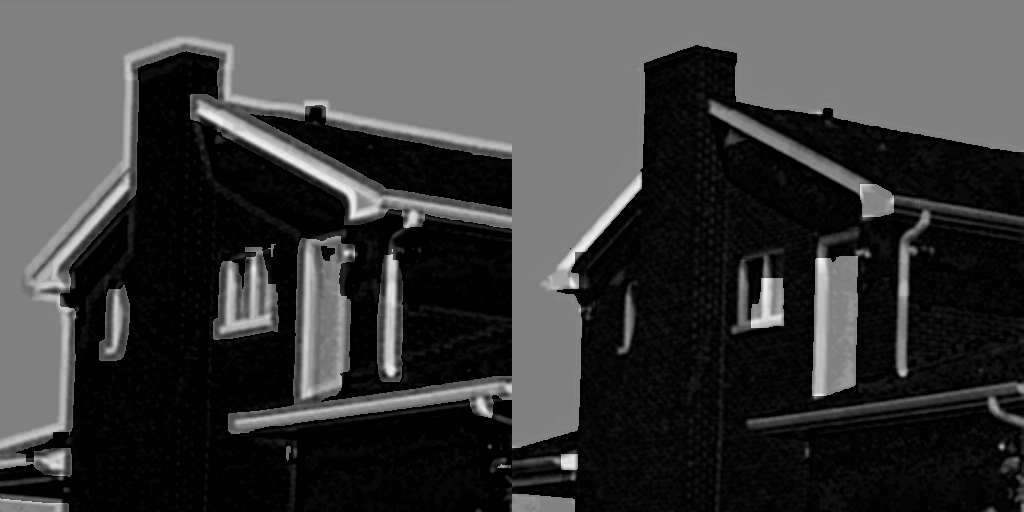

In [5]:
# The Dynamic Gist is obtained by subtracting the img_texture_threshold from the original image.
# The filtered image gives us the texture of the image.
img_dynamic_gist = img - img_texture_threshold
# The Texture Gist is obtained by subtracting img_texture_noise_threshold from the original image.
# The filtered image gives us the texture along with the noise of the image.
img_texture_gist = img - img_texture_noise_threshold
mosaicview(img_dynamic_gist, img_texture_gist; nrow=1)

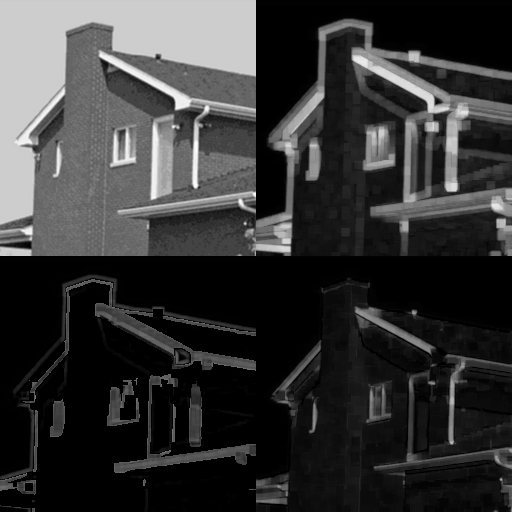

In [6]:
# We extract out the smooth/ramp parts of the image.
# The darker section of the image consist of the ramp edges. The brighter pixels are mostly noise.
ramp = img_dynamic_gist - img_texture_gist
# Filtered-out edges
edge = img_max - img_min
# Smoothed-out version of edge
edge_smoothed = img_min_max - img_max_min
mosaicview(img, ramp, edge, edge_smoothed; nrow=2)

# References

Verbeek, P. W., Vrooman, H. A., & Van Vliet, L. J. (1988). [Low-level image processing by max-min filters](https://core.ac.uk/download/pdf/194053536.pdf). Signal Processing, 15(3), 249-258.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*